In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
from IPython.display import display


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/test.csv
data/train.csv
data/sample_submission.csv


In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
print('Shape of test: ',len(test_data))
print(train_data.columns.to_list(), '\n')
#train_data.drop(columns = ['PassengerId','Name'], inplace = True)
test_ids = test_data.PassengerId.copy().to_list()
#test_data.drop(columns = ['PassengerId','Name'], inplace = True)
display(train_data.head(),test_data.head())

Shape of test:  4277
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported'] 



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
# Lets try to fill in the categorical values with 
train_data = train_data.fillna(method = 'ffill')
test_data = test_data.fillna(method = 'ffill')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
import re
def splitter(text):
    fields = re.findall('\w+', text)
    return fields

def seperate(df, key, into, split_method = splitter):

    def apply_splitter(text):
        fields = splitter(text)
        return pd.Series({into[i]: f for i, f in enumerate(fields)})
    
    fixed_vars = df.columns.difference([key])
    tibble = df[fixed_vars].copy()
    tibble_extra = df[key].apply(apply_splitter)
    return pd.concat([tibble, tibble_extra], axis = 1)


train_data = seperate(train_data, key ='Cabin', into = ['deck', 'num', 'side'])
test_data = seperate(test_data, key ='Cabin', into = ['deck', 'num', 'side'])
train_data.head()

,Age,CryoSleep,Destination,FoodCourt,HomePlanet,Name,PassengerId,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,deck,num,side
0,39.0,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0001_01,0.0,0.0,0.0,False,False,0.0,B,0,P
1,24.0,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,0002_01,109.0,25.0,549.0,True,False,44.0,F,0,S
2,58.0,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,0003_01,43.0,0.0,6715.0,False,True,49.0,A,0,S
3,33.0,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0003_02,0.0,371.0,3329.0,False,False,193.0,A,0,S
4,16.0,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,0004_01,303.0,151.0,565.0,True,False,2.0,F,1,S


In [7]:
# Clean Data, Change Categorical Variables to Numerical Representations. 
planet_maps = dict(zip(train_data['HomePlanet'].unique(),range(len(train_data['HomePlanet'].unique()))))
dest_maps = dict(zip(train_data['Destination'].unique(),range(len(train_data['HomePlanet'].unique()))))
deck_maps = dict(zip(train_data['deck'].unique(),range(len(train_data['deck'].unique()))))
side_maps = dict(zip(train_data['side'].unique(),range(len(train_data['side'].unique()))))

# Training data 
train_data.HomePlanet = train_data.HomePlanet.map(planet_maps)
train_data.Destination = train_data.Destination.map(dest_maps)
train_data.deck = train_data.deck.map(deck_maps)
train_data.side = train_data.side.map(side_maps)
train_data.CryoSleep = train_data.CryoSleep.astype(bool)
train_data.VIP = train_data.VIP.astype(bool)

# Testing Data 
test_data.HomePlanet = test_data.HomePlanet.map(planet_maps)
test_data.Destination = test_data.Destination.map(dest_maps)
test_data.deck = test_data.deck.map(deck_maps)
test_data.side = test_data.side.map(side_maps)
test_data.CryoSleep = test_data.CryoSleep.astype(bool)
test_data.VIP = test_data.VIP.astype(bool)


train_data.head()

,Age,CryoSleep,Destination,FoodCourt,HomePlanet,Name,PassengerId,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,deck,num,side
0,39.0,False,0,0.0,0,Maham Ofracculy,0001_01,0.0,0.0,0.0,False,False,0.0,0,0,0
1,24.0,False,0,9.0,1,Juanna Vines,0002_01,109.0,25.0,549.0,True,False,44.0,1,0,1
2,58.0,False,0,3576.0,0,Altark Susent,0003_01,43.0,0.0,6715.0,False,True,49.0,2,0,1
3,33.0,False,0,1283.0,0,Solam Susent,0003_02,0.0,371.0,3329.0,False,False,193.0,2,0,1
4,16.0,False,0,70.0,1,Willy Santantines,0004_01,303.0,151.0,565.0,True,False,2.0,1,1,1


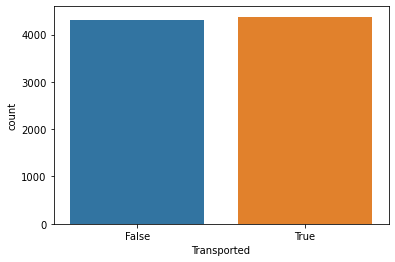

In [8]:
# Check the distribution 
count_plot_transported = sns.countplot(x = 'Transported', data = train_data)

Seems like the response is evenly distributed. Equivalent to a coinflip as both outcomes are equally likley. 

<AxesSubplot:xlabel='Transported', ylabel='count'>

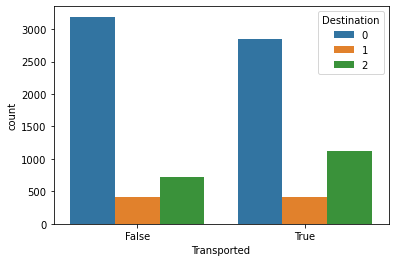

In [9]:
# A deeper look at which destinations have the most success and failures. 
sns.countplot(x = 'Transported', hue = 'Destination', data = train_data)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report

# Define Data
X = train_data.drop(columns = ['Transported','PassengerId','Name'])
y = train_data['Transported']

# Define Scalar
scaler = preprocessing.StandardScaler().fit(X)
X_train = scaler.transform(X)

# Fit the model 
log_model = LogisticRegression(max_iter = 100).fit(X_train, y)

In [11]:
# List Coef
d = dict(zip(X.columns, list(log_model.coef_[0])))
coef_df = pd.DataFrame(d, index = [0])
coef_df.insert(0, 'Intercept', log_model.intercept_)
coef_df

,Intercept,Age,CryoSleep,Destination,FoodCourt,HomePlanet,RoomService,ShoppingMall,Spa,VIP,VRDeck,deck,num,side
0,-0.322766,-0.067498,0.8108,0.165,0.987389,-0.260371,-0.735071,0.41836,-1.677499,0.040952,-1.652861,-0.092422,-0.07188,0.274473


In [12]:
# Get some Accuracy Stats. 
predictions = log_model.predict(X_train)
print(classification_report(y, predictions))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
print('\n',confusion_matrix(y, predictions))

              precision    recall  f1-score   support

       False       0.79      0.77      0.78      4315
        True       0.78      0.80      0.79      4378

    accuracy                           0.78      8693
   macro avg       0.78      0.78      0.78      8693
weighted avg       0.78      0.78      0.78      8693


 [[3308 1007]
 [ 873 3505]]


In [13]:
# Lets give Gradient Boosting a go
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# Define the model
model = GradientBoostingClassifier()
model.fit(X_train, y)
# Define the Evaluation method 
cv = RepeatedStratifiedKFold(n_splits = 28, n_repeats = 3, random_state = 1)
# Evaluate the model on the dataset
n_scores = cross_val_score(model, X_train, y, scoring = 'accuracy', cv = cv, n_jobs = -1)
# Print Performance
print(f'Mean Accuracy:{np.mean(n_scores)}, Standard Deviation: {np.std(n_scores)}')

Mean Accuracy:0.8051265428897418, Standard Deviation: 0.021640565384937048


In [14]:
# Log Model Predictions 
X_test = scaler.transform(test_data.drop(columns = ['PassengerId','Name']))
df_out = dict(zip(test_ids, log_model.predict(X_test)))
out_df = pd.DataFrame(df_out, index = ['Transported']).T.reset_index()
out_df.rename(columns = {'index':'PassengerId'}, inplace = True)

In [15]:
# Prediction Using Gradient Boosting. 
yhat = model.predict(X_test)
yhat.shape
X_test.shape
test_data.shape

(4277, 15)

In [16]:
# Data frame Submission
df_gb_out = dict(zip(test_ids, yhat))
out_df_gb = pd.DataFrame(df_gb_out, index = ['Transported']).T.reset_index()
out_df_gb.rename(columns = {'index':'PassengerId'}, inplace = True)
out_final = out_df_gb.copy()
out_final.to_csv('submission.csv', index = False)